In [1]:
#import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Read the test and train data set 
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test= pd.read_csv("test.csv")

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.shape

(418, 11)

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Fill values to the missing data 
#from sklearn.impute import SimpleImputer
#Imp = SimpleImputer(missing_values='NaN',strategy='median')
train_data.Age =train_data['Age'].fillna(train_data['Age'].median())

In [10]:
#rain_data['Age'].fillna(train_data['Age'].median())

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_data.set_index('PassengerId',inplace=True)

In [13]:
train_data = pd.get_dummies(train_data, columns=['Embarked'],drop_first=True)

In [14]:
train_data = pd.get_dummies(train_data,columns=['Sex'],drop_first = True)

In [15]:
# Adjust the fare values 
train_data['Fare'] =train_data['Fare'].astype(int)
train_data.loc[train_data.Fare<=8,'Fare']=0
train_data.loc[(train_data.Fare>8)  & (train_data.Fare <=14 ),'Fare']=1
train_data.loc[(train_data.Fare>14)&(train_data.Fare<=31),'Fare']=2
train_data.loc[(train_data.Fare>31),'Fare']=3

In [16]:
train_data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0,NaN,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,3,C85,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0,NaN,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3,C123,0,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,0,NaN,0,1,1


In [17]:
#Adjust the Age values 
train_data['Age']=train_data['Age'].astype(int)
train_data.loc[ train_data['Age'] <= 16, 'Age']= 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[train_data['Age'] > 64, 'Age'] = 4

In [18]:
train_data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,NaN,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,PC 17599,3,C85,0,0,0
3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,0,NaN,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,113803,3,C123,0,1,0
5,0,3,"Allen, Mr. William Henry",2,0,0,373450,0,NaN,0,1,1


In [19]:
#Drop the label name, ticket and cabin 
train_data.drop(['Name','Ticket','Cabin'],axis = 1,inplace =True)

In [20]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,
1,0,3,1,1,0,0,0,1,1
2,1,1,2,1,0,3,0,0,0
3,1,3,1,0,0,0,0,1,0
4,1,1,2,1,0,3,0,1,0
5,0,3,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,0,0,1,0,1,1
888,1,1,1,0,0,2,0,1,0
889,0,3,1,1,2,2,0,1,0


In [21]:
# Statistics 

In [22]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.288440,0.523008,0.381594,1.374860,0.086420,0.722783,0.647587
std,0.486592,0.836071,0.812038,1.102743,0.806057,1.186439,0.281141,0.447876,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,4.000000,8.000000,6.000000,3.000000,1.000000,1.000000,1.000000


In [23]:
train_data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
Survived,,,,,,,,
0,2.531876,1.31694,0.553734,0.329690,1.076503,0.085610,0.777778,0.852459
1,1.950292,1.24269,0.473684,0.464912,1.853801,0.087719,0.634503,0.318713


In [24]:
train_data.groupby('Sex_male').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,1.210191,0.694268,0.649682,1.789809,0.114650,0.646497
1,0.188908,2.389948,1.331023,0.429809,0.235702,1.149047,0.071057,0.764298


In [25]:
#Apply Classifier 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
#from xgboost import XGBClassifier


In [26]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [27]:
X=train_data.drop('Survived',axis=1)
y=train_data['Survived'].astype(int)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

In [29]:
len(acc_dict)

10

Text(0.5, 1.0, 'Classifier Accuracy')

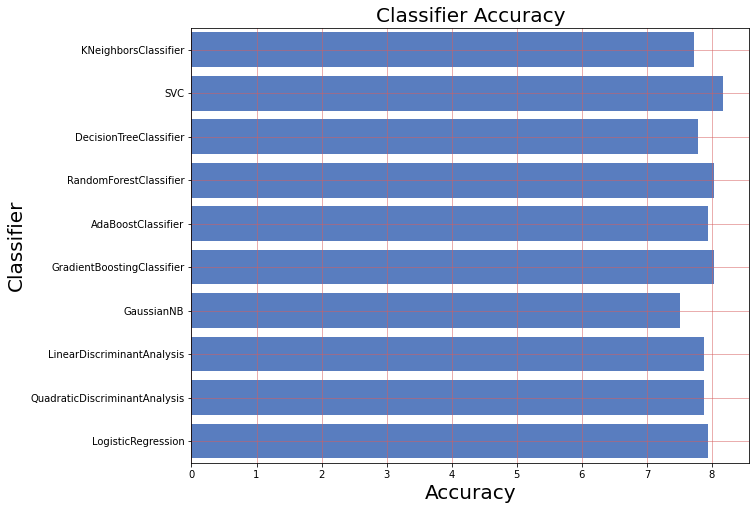

In [30]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

In [31]:
#Apply on the test dataset 
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test_data.set_index("PassengerId",inplace=True )


In [33]:
test_data.Age =test_data['Age'].fillna(test_data['Age'].median())
test_data.Fare =test_data['Fare'].fillna(test_data['Fare'].median())

In [34]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [35]:
#Change the sex and embarked in terms of integers 
test_data = pd.get_dummies(test_data, columns=['Embarked'],drop_first=True)

In [36]:
test_data = pd.get_dummies(test_data, columns=['Sex'],drop_first=True)

In [37]:
test_data.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1
895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0


In [38]:
# Adjust the fare values of the test dataset
#test_data['Fare'] =test_data['Fare'].astype(int)
test_data.loc[test_data.Fare<=8,'Fare']=0
test_data.loc[(test_data.Fare>8)  & (test_data.Fare <=14 ),'Fare']=1
test_data.loc[(test_data.Fare>14)&(test_data.Fare<=31),'Fare']=2
test_data.loc[(test_data.Fare>31),'Fare']=3

In [39]:
# Adjust the age values of the test dataset
#test_data['Age']=test_data['Age'].astype(int)
test_data.loc[ test_data['Age'] <= 16, 'Age']= 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[test_data['Age'] > 64, 'Age'] = 4

In [40]:
test_data.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",2.0,0,0,330911,0.0,NaN,1,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,1,0,363272,0.0,NaN,0,1,0
894,2,"Myles, Mr. Thomas Francis",3.0,0,0,240276,1.0,NaN,1,0,1
895,3,"Wirz, Mr. Albert",1.0,0,0,315154,1.0,NaN,0,1,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,1,1,3101298,1.0,NaN,0,1,0


In [41]:
test_data.drop(['Name','Ticket','Cabin'],axis = 1,inplace =True)

In [42]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,
892,3,2.0,0,0,0.0,1,0,1
893,3,2.0,1,0,0.0,0,1,0
894,2,3.0,0,0,1.0,1,0,1
895,3,1.0,0,0,1.0,0,1,1
896,3,1.0,1,1,1.0,0,1,0


In [43]:
# Define the classifier 
classifier=SVC()
xtrain=train_data.iloc[:,1:]
ytrain=train_data.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
classifier.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [46]:
Result=classifier.predict(test_data)
print(Result)
print(len(Result))

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418


In [47]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Result})
#output.to_csv('my_submission.csv', index=False)

In [48]:
output.to_csv('my_submission.csv', index=False)